<a href="https://colab.research.google.com/github/Reemabdi/pretrained-models-eval-keras/blob/main/Evaluating_and_Testing_Pre_trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 model without top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze pre-trained layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Build model
model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls /content/drive/MyDrive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"  # make sure this name matches exactly
extract_path = "/content/waste_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully")


In [ ]:
train_path = extract_path + '/train'
test_path = extract_path + '/test'


In [ ]:
import os

base_path = '/content/drive/MyDrive/YourFolderName'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')


In [ ]:
import shutil
import glob

# Create folders
os.makedirs("/content/dataset/train", exist_ok=True)
os.makedirs("/content/dataset/test", exist_ok=True)

# Example: move 80% of images to train, 20% to test
image_paths = glob.glob("/content/dataset/*/*.jpg")
split_idx = int(0.8 * len(image_paths))

for img in image_paths[:split_idx]:
    shutil.move(img, "/content/dataset/train/")
for img in image_paths[split_idx:]:
    shutil.move(img, "/content/dataset/test/")


In [ ]:
from google.colab import drive
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Set paths
zip_path = '/content/drive/MyDrive/archive (2).zip'   # update if filename differs
extract_path = '/content/dataset'  # extract inside Colab for easy access

#  Unzip only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully")
else:
    print("✅ Dataset already extracted")

#  Define train & test paths
train_path = os.path.join(extract_path, 'train')
test_path = os.path.join(extract_path, 'test')

#  Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
model_vgg16 = Model(inputs=base_model.input, outputs=output)

# Compile
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import os

print("Train path exists:", os.path.exists("/content/dataset/train"))
print("Train images count:", sum([len(files) for r, d, files in os.walk("/content/dataset/train")]))


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
import os

for root, dirs, files in os.walk("/content/dataset/train"):
    print(root, len(files))


In [ ]:
train_data = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
!ls /content/dataset
!ls /content/dataset/train
!find /content/dataset/train -type f | wc -l


In [ ]:
!find /content/dataset -type f | head -20


In [ ]:
train_data = train_datagen.flow_from_directory(
    '/content/dataset/DATASET/TRAIN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
history_vgg16 = model_vgg16.fit(
    train_data,
    epochs=1,
    validation_data=test_data
)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory('train', target_size=(224,224), batch_size=32, class_mode='binary')

test_data = train_datagen.flow_from_directory('test', target_size=(224,224), batch_size=32, class_mode='binary')

history_vgg16 = model_vgg16.fit(train_data, epochs=5, validation_data=test_data)


In [ ]:
resnet50_eval = model_resnet50.evaluate(test_data)
vgg16_eval = model_vgg16.evaluate(test_data)

print("ResNet50 Accuracy:", resnet50_eval[1])
print("VGG16 Accuracy:", vgg16_eval[1])


In [ ]:
resnet50_eval = model_resnet50.evaluate(test_data)
vgg16_eval = model_vgg16.evaluate(test_data)

print("ResNet50 Accuracy:", resnet50_eval[1])
print("VGG16 Accuracy:", vgg16_eval[1])


In [ ]:
import numpy as np

predictions_vgg16 = model_vgg16.predict(test_data)
predicted_classes_vgg16 = np.where(predictions_vgg16 > 0.5, 1, 0)

predictions_resnet = model_resnet50.predict(test_data)
predicted_classes_resnet = np.where(predictions_resnet > 0.5, 1, 0)


In [ ]:
import os

print("DATASET:", os.listdir("/content/drive/MyDrive/waste_dataset/DATASET"))
print("dataset:", os.listdir("/content/drive/MyDrive/waste_dataset/dataset"))


In [ ]:
train_path = "/content/drive/MyDrive/waste_dataset/DATASET/TRAIN"
test_path = "/content/drive/MyDrive/waste_dataset/DATASET/TEST"


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
!ls dataset/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls /content/drive/MyDrive


In [ ]:
!ls /content/dataset/train


In [ ]:
train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()


In [ ]:
import os
import shutil

for folder in ['train', 'test']:
    base_dir = f'/content/dataset/{folder}'
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            class_name = file.split('_')[0]  # Example: 'plastic_1.jpg' -> 'plastic'
            class_folder = os.path.join(base_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(base_dir, file), os.path.join(class_folder, file))


In [ ]:
!ls /content/dataset/train
!ls /content/dataset/test


In [ ]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)

print("Classes:", train_dataset.classes)


In [ ]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)

print("Classes:", train_dataset.classes)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all layers except final FC
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes: Negative / Positive

print(model.fc)  # ✅ Screenshot this output


In [ ]:
!ls /content/dataset/train
!ls /content/dataset/test


In [ ]:
train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)


In [ ]:
!ls /content/dataset/train
!ls /content/dataset/test


In [ ]:
import os
import shutil

for folder in ['train', 'test']:
    base_dir = f'/content/dataset/{folder}'
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            class_name = file.split('_')[0]  # Example: plastic_1.jpg -> plastic
            class_folder = os.path.join(base_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(base_dir, file), os.path.join(class_folder, file))


In [ ]:
!ls /content/dataset/train



In [ ]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)

print("Classes:", train_dataset.classes)


In [ ]:
!ls /content/dataset/train
!ls /content/dataset/test


In [ ]:
import os
import shutil

for folder in ['train', 'test']:
    base_dir = f'/content/dataset/{folder}'
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            class_name = file.split('_')[0]  # Example: plastic_1.jpg → plastic
            class_folder = os.path.join(base_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(base_dir, file), os.path.join(class_folder, file))
            print(f"Moved {file} -> {class_folder}")


In [ ]:
!ls /content/dataset/train


In [ ]:
train_dataset = datasets.ImageFolder("/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder("/content/dataset/test", transform=transform)


In [ ]:
import os
import shutil

for folder in ['train', 'test']:
    base_dir = f'/content/dataset/{folder}'
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            class_name = file.split('_')[0]  # Example: plastic_1.jpg -> plastic
            class_folder = os.path.join(base_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(base_dir, file), os.path.join(class_folder, file))
            print(f"Moved {file} -> {class_folder}")

print("\n✅ Folder structure after organization:")
!tree /content/dataset -L 2


In [ ]:
from torchvision import datasets

train_dataset = datasets.ImageFolder("/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder("/content/dataset/test", transform=transform)

print("Classes:", train_dataset.classes)


In [ ]:
import os

for folder in ['train', 'test']:
    path = f"/content/dataset/{folder}"
    print(f"\n{folder} contents:", os.listdir(path))


In [ ]:
import os
import shutil

for folder in ['train', 'test']:
    base_dir = f'/content/dataset/{folder}'
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            class_name = file.split('_')[0]  # Example: plastic_1.jpg → plastic
            class_folder = os.path.join(base_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(base_dir, file), os.path.join(class_folder, file))

print("✅ Dataset organized successfully!")


In [ ]:
for folder in ['train', 'test']:
    for root, dirs, files in os.walk(f'/content/dataset/{folder}'):
        print(root, "->", len(files), "files")


In [ ]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(root="/content/dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/dataset/test", transform=transform)

print("Classes:", train_dataset.classes)


In [ ]:
import os

path = "/content/dataset"
for root, dirs, files in os.walk(path):
    print(root, "->", len(files), "files")


In [ ]:
import zipfile
with zipfile.ZipFile("your_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [ ]:
import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/waste_dataset"

print("Folders in dataset:", os.listdir(dataset_path))


In [ ]:
import os

path = "/content/drive/MyDrive/waste_dataset"
print(os.listdir(path))


In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
import os

for folder in ["DATASET", "dataset"]:
    path = f"/content/drive/MyDrive/waste_dataset/{folder}"
    print(f"\n📂 {folder}: ", os.listdir(path))


In [ ]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/waste_dataset/DATASET/TRAIN",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/waste_dataset/DATASET/TEST",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

dataset_path = "/content/drive/MyDrive/waste_dataset/DATASET"  # ✅ Corrected path

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Using correct folder names (case-sensitive)
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "TRAIN"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "TEST"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Simple CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=1, validation_data=test_generator)


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

tf.keras.utils.set_random_seed(42)  # optional for reproducibility

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# This tells TensorFlow to skip bad images
tf.data.experimental.enable_debug_mode()


In [ ]:
import os
os.environ["TF_ENABLE_IMAGE_IO"] = "1"


In [ ]:
import os
from PIL import Image

dataset_dir = "/content/drive/MyDrive/waste_dataset"

for folder in ["TRAIN", "TEST"]:
    folder_path = os.path.join(dataset_dir, folder)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # verify that it's a valid image
            except:
                print("Removing corrupted file:", file_path)
                os.remove(file_path)


In [ ]:
import os
from PIL import Image

dataset_root = "/content/drive/MyDrive/waste_dataset"

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # accepted formats

for subfolder in ['TRAIN', 'TEST']:
    folder_path = os.path.join(dataset_root, subfolder)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)

            # 1️⃣ Remove non-image files
            if not file.lower().endswith(valid_extensions):
                print("❌ Removing non-image file:", file_path)
                os.remove(file_path)
                continue

            # 2️⃣ Remove zero-byte or unreadable files
            if os.path.getsize(file_path) == 0:
                print("❌ Removing empty file:", file_path)
                os.remove(file_path)
                continue

            # 3️⃣ Try opening with PIL
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except Exception:
                print("❌ Removing corrupted file:", file_path)
                os.remove(file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive
!ls /content/drive/MyDrive/waste_dataset


 0becb62b88b4aa3b5fb491f349811c5c.pdf
 0d42e89b8b827fe773a1d5a705e145f8.pdf
 100c1e1262bfc4f7e8856293eab1c287.pdf
 1c1fd78590551b1e69adc26a38c8f9b3.pdf
 2fa72daa-ef44-4feb-bcef-6b1d68a6f2a1.jpg
 354e89ca1a3e5e2934514b720fd54da8.pdf
 3c186d48b5c28e5c436fa21f3880e9de.pdf
'3-Proof Techniques part2-formatting and more illustration.pptx'
 400af2879af06d9708802841914926c9.pdf
 44386D92-EB63-4E0C-A2AC-125BBC354051.jpeg
 4a6c16b4bb01c1a3797ecd08f7accf77.pdf
 4e71c003dc57eb46051a44dbcfa78bd3.pdf
 5728d963a9f6e43bfc920e2e577307f5.pdf
 6631fa41feef1b9b7d18fd6ee1685241.pdf
 69ef6ab6ff5a66d9cd9b4442420e0137.pdf
 71be2a5d85ace1a5af0d0431514ab66f.pdf
 7c4febfc0259e3208f0b15c8b9254f8c.pdf
 8d867f3be0ed06faa8859c1b5c7f9c63.pdf
 8e199f08086e926c10e9acaf53b682e8.pdf
 959fc16ce17cb2ae95e99a5b08b67597.pdf
 9fbd16e2fd1472a6587b8ea99b856fc5.pdf
 a52b41e1b8f78ccc63af1230b8704d7e.pdf
 a901d15079aea14b7e7662de7c02eb24.pdf
 ab3ea5b5f4b7d96256a19dc2a1ef8d14.pdf
 aec3ab92d35f51c14e8fafdfaa0f6e92.pdf
 aef9591bbbbf2

In [ ]:
!ls /content/drive/MyDrive/waste_dataset/dataset/DATASET


TEST  TRAIN


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = "/content/drive/MyDrive/waste_dataset/dataset/DATASET/TRAIN"
test_path = "/content/drive/MyDrive/waste_dataset/dataset/DATASET/TEST"

# Define ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

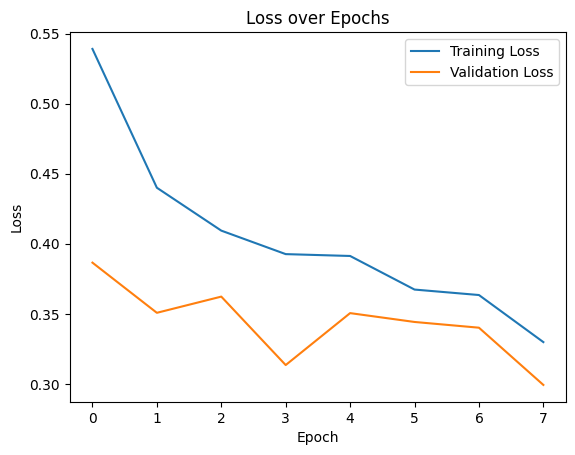

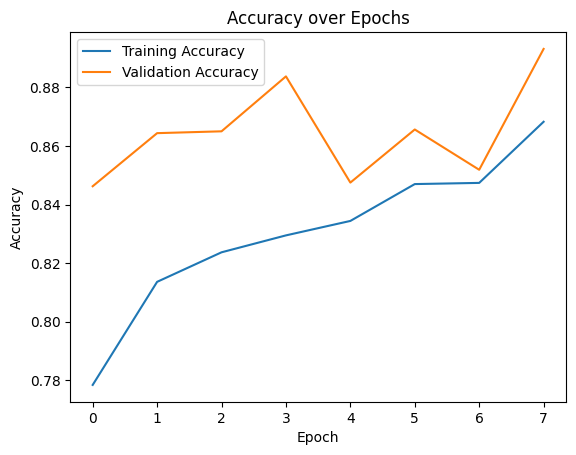

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8760 - loss: 0.3199
Test Accuracy: 0.8810
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step
sample 0 predicted value: 1 actual value: 0


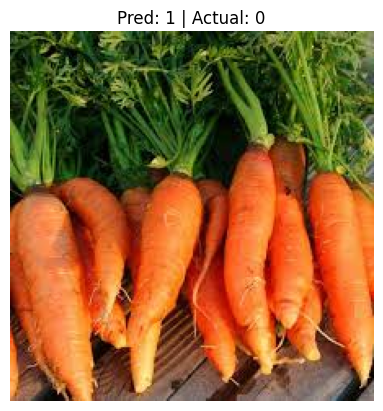

sample 1 predicted value: 1 actual value: 0


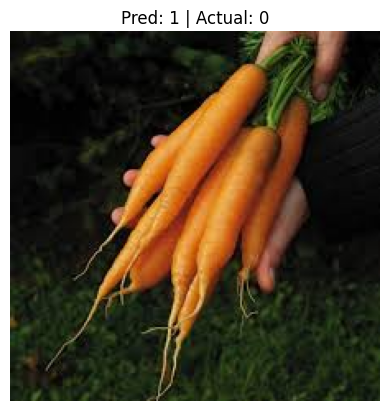

sample 3 predicted value: 1 actual value: 0


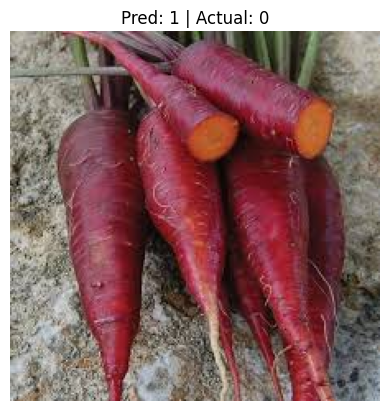

sample 5 predicted value: 1 actual value: 0


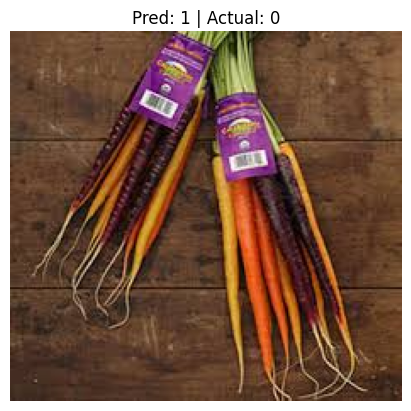

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate accuracy
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Identify misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Show first 4 misclassified samples
for i in range(4):
    idx = misclassified_indices[i]
    img_path = test_generator.filepaths[idx]
    print(f"sample {idx} predicted value: {predicted_classes[idx]} actual value: {true_classes[idx]}")

    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_classes[idx]} | Actual: {true_classes[idx]}")
    plt.axis('off')
    plt.show()
